# Базові моделі класифікації з використанням бібліотеки Scikit-Learn  
Алгоритм класифікації – це метод машинного навчання з вчителем, який використовується для того, щоб навчити комп'ютер розпізнавати до якої категорії (або класу) належить новий об'єкт на основі наявних даних. Іншими словами, ці алгоритми допомагають приймати рішення, класифікуючи дані у певні групи. Модель класифікації навчається на основі заданого набору даних або спостережень, а потім класифікує нове спостереження на кілька класів або груп. Наприклад, «Так» або «Ні», 0 або 1, «Спам» або «Не спам», «кіт» або «собака» тощо. Класи можна називати цілями/мітками або категоріями.  
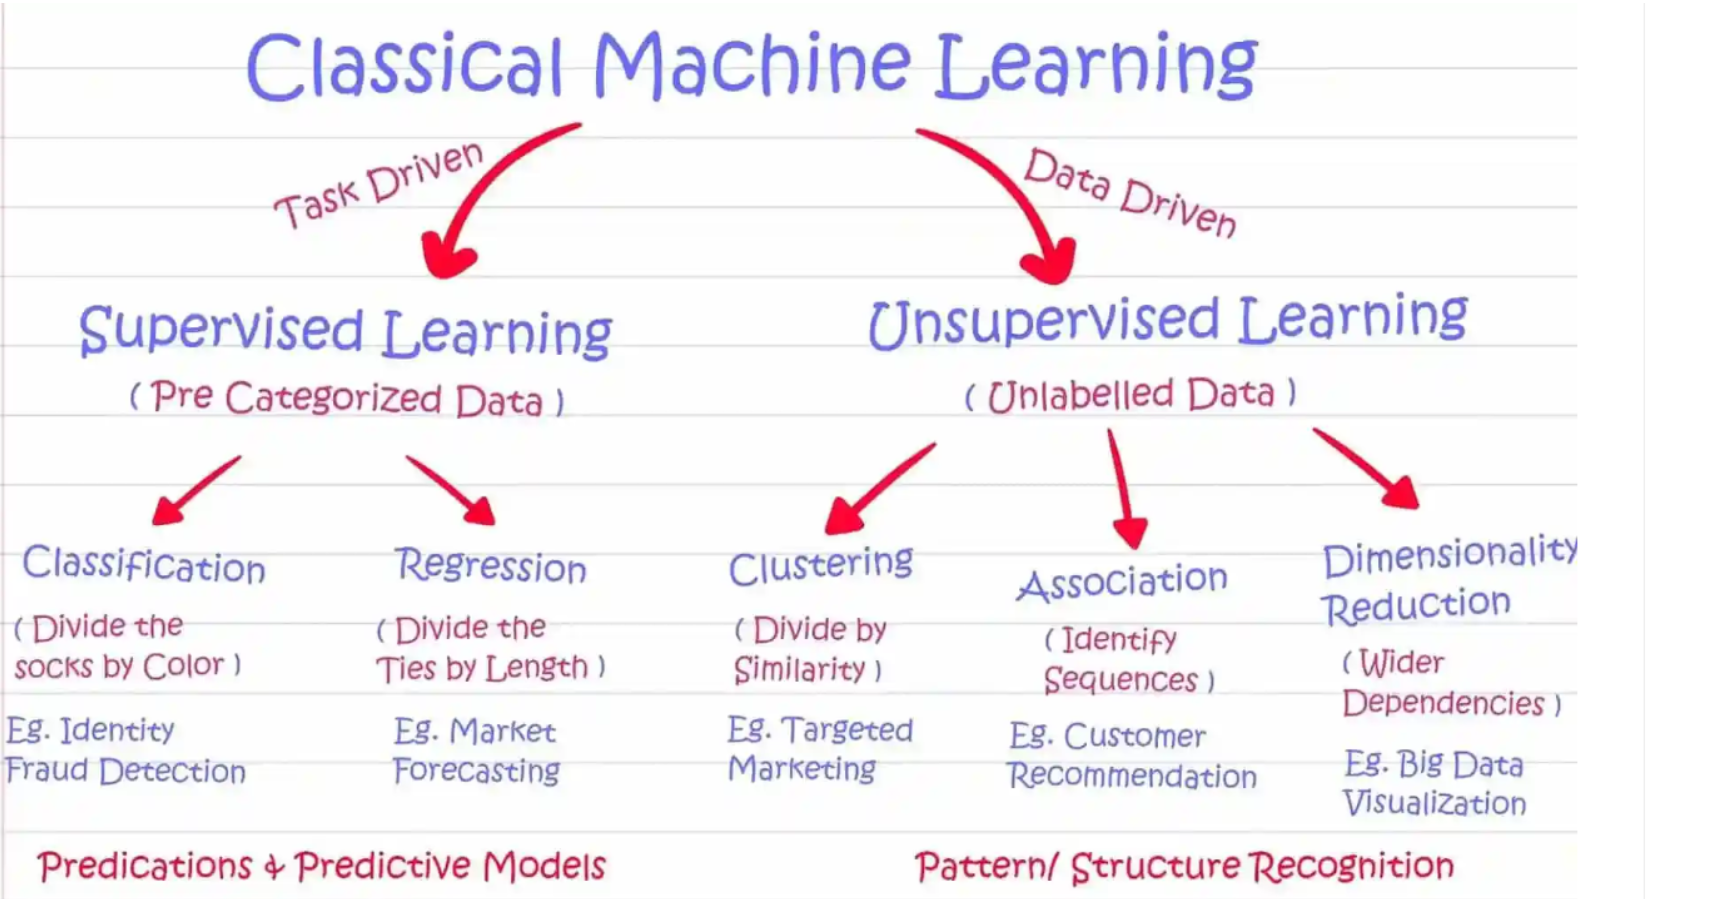  

І класифікація, і регресія використовуються для передбачення результатів на основі набору даних, де є **незалежні змінні (предиктори) та залежна (цільова) змінна.**

#### На відміну від регресії, цільова (залежна) змінна в моделях класифікації є категорією, а не  кількісною величиною.  Наприклад "зелений або синій", "фрукт або тварина", тощо.     

Прикладами задач класифікації можуть бути:  
- Розподіл коментарів Twitter за тональністю – позитивні чи негативні.
- Прийняття рішень про надання позначки "спам" повідомленню електронної пошти.
- Визначення того, чи фотографія містить певний елемент, наприклад зображення собаки або котика.  

**Виділяють такі типи задач класифікації:**  
1. Бінарна класифікація – групування результату в одну з двох груп.
2. Багатокласова  класифікація  –  групування результату в одну з декількох (більше двох) груп.  
В рамках даного курсу ми не розглядатимемо задачі багатокласової класифікації, а зосередимо увагу тільки на задачах бінарної класифікації.

Бібліотека Scikit-Learn надає доступ до різних алгоритмів класифікації. Ми розглянемо приклад практичної реалізації алгоритму логістичної регресії (Logistic Regression).  

## 1. Підготовка даних  

In [3]:
#імпортуємо необхідні бібліотеки
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# зчитаємо файл з початковими даними в датафрейм data
df = pd.read_csv('audit_risk.csv')
df.head()

,Sector_score,Score_A,Score_B,TOTAL,numbers,Score_MV,District_Loss,History,Inherent_Risk,CONTROL_RISK,Audit_Risk,Risk
0,3.89,0.6,0.2,6.68,5.0,0.2,2,0,8.574,0.4,1.7148,1
1,3.89,0.2,0.2,4.83,5.0,0.2,2,0,2.554,0.4,0.5108,0
2,3.89,0.2,0.2,0.74,5.0,0.2,2,0,1.548,0.4,0.3096,0
3,3.89,0.2,0.6,10.80,6.0,0.6,2,0,17.530,0.4,3.5060,1
4,3.89,0.2,0.2,0.08,5.0,0.2,2,0,1.416,0.4,0.2832,0


### Опис датафрейму  
_Необхідно допомогти аудиторам, побудувавши класифікаційну модель, яка може класифікувати(розпізнати) шахрайську фірму на основі поточних та ретроспективних факторів ризику_  

Sector_score - репутаційна оцінка організації у відповідному секторі    
Score_A - оцінка виявлених під час перевірки невідповідностей у запланованих витратах фірми    
Score_B - оцінка виявлених під час перевірки невідповідностей у незапланованих витратах фірми    
TOTAL - загальний розмір виявлених невідповідностей у витратах фірми    
numbers - к-ть виявлених під час перевірки невідповідностей у витратах фірми у минулому  
Score_MV - рейтингова оцінка фірми, пов'язана недобросовісним використанням коштів під час минулих аудиторських перевірок    
District_Loss - історична оцінка ризику для галузі, в якій працює фірма, за останні 10 років    
History - середній збиток фірми за останні 10 років   
Inherent_Risk, CONTROL_RISK, Audit_Risk - оцінка внутрішнього ризику, ризику контролю та аудиторського ризику відповідно  
**Цільова (таргетована, залежна) змінна:**   
Risk - клас ризику, присвоєний аудиторській справі:  
- 1 - «шахрайські» фірми  
- 0 - «надійні» фірми


### Приклад реалізації алгоритму класифікації за допомогою бібліотеки Scikit Learn    
  
#### Що варто зробити до реалізації алгоритму класифікації? 
Подивитися на датасет: .head (), .info (), .describe ()  
**ОБОВ'ЯЗКОВО: Почистити від пропущених значень: fillna(), dropna ()**   
**ОБОВ'ЯЗКОВО: Перекодувати стовпчики із категоріальними даними (інформація подана у вигляді тексту)**  
Проаналізувати викиди в даних, за потреби - видалити їх  
**ОБОВ'ЯЗКОВО: Маштабувати (н-клад, стандартизувати) стовпчики із числовими даними** 

In [7]:
# Перевіримо дані на наявність пропусків. Якщо є пропуски, їх обов'язково необхідно заповнити або видалити!
# Якщо є категоріальні ознаки, їх необхідно обов'язково перекодувати в числові!
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sector_score   776 non-null    float64
 1   Score_A        776 non-null    float64
 2   Score_B        776 non-null    float64
 3   TOTAL          776 non-null    float64
 4   numbers        776 non-null    float64
 5   Score_MV       776 non-null    float64
 6   District_Loss  776 non-null    int64  
 7   History        776 non-null    int64  
 8   Inherent_Risk  776 non-null    float64
 9   CONTROL_RISK   776 non-null    float64
 10  Audit_Risk     776 non-null    float64
 11  Risk           776 non-null    int64  
dtypes: float64(9), int64(3)
memory usage: 72.9 KB


Пропусків в даних немає, стовпчиків в текстовому форматі також немає

In [9]:
#Визначимо матрицю незалежних змінних (факторів) та вектор залежної (цільової) змінної
X = df.drop(df[['Risk']], axis=1)
print(X.head())
y = df['Risk']
print(y.head())

   Sector_score  Score_A  Score_B  TOTAL  numbers  Score_MV  District_Loss  \
0          3.89      0.6      0.2   6.68      5.0       0.2              2   
1          3.89      0.2      0.2   4.83      5.0       0.2              2   
2          3.89      0.2      0.2   0.74      5.0       0.2              2   
3          3.89      0.2      0.6  10.80      6.0       0.6              2   
4          3.89      0.2      0.2   0.08      5.0       0.2              2   

   History  Inherent_Risk  CONTROL_RISK  Audit_Risk  
0        0          8.574           0.4      1.7148  
1        0          2.554           0.4      0.5108  
2        0          1.548           0.4      0.3096  
3        0         17.530           0.4      3.5060  
4        0          1.416           0.4      0.2832  
0    1
1    0
2    0
3    1
4    0
Name: Risk, dtype: int64


### 1.1. Cтандартизація даних  
Більшість алгоритмів класифікації вимагають попередньої стандартизації даних. Метою стандартизації є перетворення вихідного набору даних в новий із середнім значенням рівним 0 і стандартним відхиленням рівним 1. Це дозволить привести різні дані в різних одиницях вимірювання і діапазонах значень до єдиного виду, що у свою чергу дозволить порівнювати їх між собою або використовувати для розрахунку міри близькості об'єктів.  
   
**Чому ми повинні масштабувати (наприклад, стандартизувати або нормалізувати) ознаки?**

Деякі алгоритми машинного навчання чутливі до масштабу ознак. Тому попередня стандартизація даних дозволить краще навчити алгоритм та отримати вищі показники якості алгоритму.

#### <font color='red'> Стандартизувати потрібно тільки фактори (незалежні змінні). Цільову змінну У НЕ СТАНДАРТИЗУЄМО  </font> 

In [11]:
#Стандартизуємо матрицю Х
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

### 1.2. Розділення даних на навчальну і тестову вибірки  
Навчальну вибірку використовуємо для навчання моделі  
Тестову вибірку використовуємо для перевірки якості побудованої моделі  

In [13]:
# імпортуємо train_test_split із модуля sklearn.model_selection
from sklearn.model_selection import train_test_split

#Розділимо дані на навчальну і тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X_std, y, stratify = y, test_size=0.2, random_state=0)

- параметр stratify = y означає, що метод train_test_split повертає навчальні та тестові вибірки, які мають ті самі пропорції міток класів, що й набір вхідних даних. Наприклад, якщо цільова змінна y є бінарною змінною зі значеннями 0 або 1 і  містить 40% нулів і 60 % одиниць, то параметр stratify=y гарантуватиме, що при розбитті даних навчальна та тестова вибірка також міститимуть 40% нулів і 60 % одиниць.  
- параметр test_size визначає розмір тестової вибірки. Як правило, test_size приймають рівним 0.2 або 0.3 (відповідно 20% та 30% від набору вхідних даних).  
- параметр random_state (йому можна присвоїти будь-яке число, необов'язково 0) гарантує, що ви отримуєте те саме розбиття на навчальну та тестову вибірки кожного разу, коли ви запускаєте свій код. 

#### Далі розглянемо практичну реалізацію логістичної регресії для вирішення задач класифікації за таким алгоритмом: 
1. Створення і навчання класифікатора  на  навчальному наборі даних  
2. Прогноз цільової змінної  
3. Оцінювання якості класифікатора (точність класифікації, матриця помилок)

### 2. Реалізація логістичної регресії  
Алгоритм лінійної регресії визначає лінійний зв’язок між незалежними та залежними змінними. Він використовує лінійне рівняння для визначення лінії, яка найкраще підходить (пряма лінія) для опису даних, що дозволяє візуалізувати та передбачити результат залежної змінної. Якщо ми маємо бінарну залежну змінну, то проблема лінійної регресії полягає в тому, що прогнозовані значення можуть виходити за межі діапазону: перевищувати 1 або опускатися нижче 0.
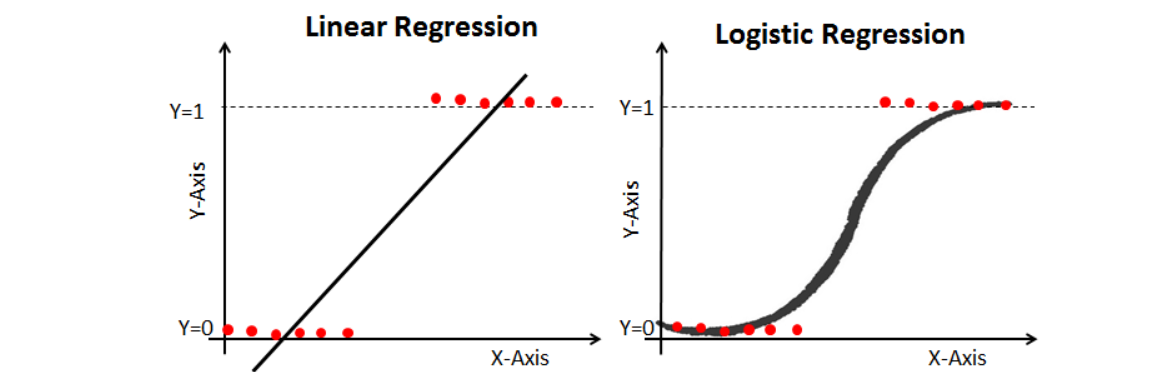
Щоб подолати ці проблеми, в задачах класифікації ми використовуємо логістичну регресію, яка перетворює пряму лінію, що найкраще апроксимує дані, в лінійній регресії на S-криву за допомогою сигмоїдної функції, яка завжди дає значення від 0 до 1.

#### Наприклад, нехтуючи тим, що цільова змінна визначає категорії та є бінарною, реалізуємо лінійну регресію 

In [52]:
# оцінимо параметри лінійної регресії
from sklearn.linear_model import LinearRegression

# 2. Задаємо метод навчання моделі
linear_reg = LinearRegression()

# 3. Оцінювання регресії на тренувальній вибірці (!!!) за допомогою методу .fit()
linear_reg.fit(X_train,y_train)

LinearRegression()

In [54]:
# розрахуємо прогнозні значення залежної змінної: деякі з них менше 0 або більше 1
Y_predict = Model_1.predict(X_test)
Y_predict

array([-0.06557749, -0.36136416, -0.04196876,  0.67677964, -0.36119214,
       -0.40249663, -0.40146341,  0.44219161,  0.57371616,  1.20256971,
       -0.35893486, -0.22325067, -0.39906081, -0.01288134,  0.514018  ,
       -0.17941772, -0.22225742, -0.40049717,  0.52695325,  1.06410958,
       -0.08968163, -0.35993039, -0.40207893, -0.39964804, -0.08815197,
        0.44030554, -0.35988483,  0.18931109, -0.27641053,  0.07142116,
        0.08945258, -0.37450872,  0.23796133, -0.22298715, -0.36049882,
       -0.37716028, -0.36226634, -0.26379358,  0.86711645,  0.19207415,
        0.33652121, -0.40231194,  0.50043143, -0.40162777, -0.35994958,
       -0.36413334, -0.22236018,  0.65939765,  1.10488613, -0.4002922 ,
        0.62149797, -0.35973935,  0.09755636, -0.40081925,  0.12894936,
        0.5162825 , -0.39938452,  0.41390254, -0.22327697,  0.21395829,
       -0.19575215, -0.2203259 , -0.04584669, -0.3604473 , -0.36003033,
       -0.40026292, -0.35838283,  0.3024906 , -0.08547316, -9.61

### Приклад оцінювання та аналізу логістичної регресії за допомогою бібліотеки Scikit-learn

In [21]:
#  Створення і навчання класифікатора  на  навчальному наборі даних
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression() 

# навчаємо модель на навчальній вибірці - X_train, y_train
lr.fit(X_train, y_train)

# робимо прогноз цільової змінної на навчальній вибірці - X_train
y_pred_train = lr.predict(X_train)

# робимо прогноз цільової змінної на тестовій вибірці - X_test
y_pred_test = lr.predict(X_test)

####   Матриця помилок та оцінка точності  класифікації  
Далі необхідно оцінити якість класифікатора. Це можна зробити за допомогою матриці помилок та основних метрик оцінювання точності класифікації.
#### Матриця помилок  
Матриця 2x2, що позначає правильні та неправильні передбачення, може допомогти нам проаналізувати точність класифікації. Ця матриця називається матрицею помилок.  
$$
\begin{array}{c|c|c}
 & \text{Predicted 0} & \text{Predicted 1} \\
\hline
\text{Actual 0} & TN & FP \\
\text{Actual 1} & FN & TP \\
\end{array}
$$
  

Горизонтальна вісь відповідає прогнозованим значенням (y-predicted), а вертикальна вісь відповідає фактичним значенням (y-actual).

TN представляє значення, які спрогнозовані як хибні та насправді є хибними.  
FP представляє значення, які спрогнозовані як істинні, але є хибними.  
FN представляє значення, які спрогнозовані як хибні, але є істинними.  
TP представляє значення, які спрогнозовані як істинні та насправді є істинними.    



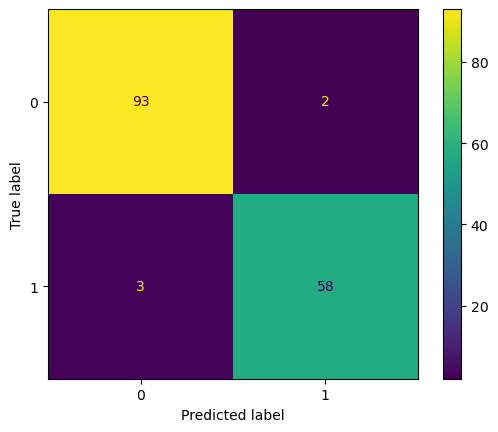

In [23]:
# Побудуємо матрицю помилок на тетовому наборі даних
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# матриця помилок
cm = confusion_matrix(y_test, y_pred_test)

# візуалізація матриці помилок
cmd = ConfusionMatrixDisplay(cm, display_labels=['0','1']) 
# display_label - задаються назви класів
cmd.plot()

**Цільова (таргетована, залежна) змінна:**   
Risk - клас ризику, присвоєний аудиторській справі:  
- 1 - «шахрайські» фірми  
- 0 - «надійні» фірми  

"Надійні" фірми (у = 0): правильно класифіковано 93 фірми, неправильно - 2 фірми  
"Шахрайські" фірми (у = 1): правильно класифіковано 58 фірм, неправильно - 3 фірми  

#### Основні метрики для оцінювання точності класифікації:  
- повна точність (accuracy score)
- точність (precision)
- повнота (recall)  
- F-міра (F-score)  

Ми будемо використовувати повну точність (accuracy score). Accuracy score класифікатора вимірюється як частка спостережень, які були правильно класифіковані: 
$$Accuracy = (TP+TN)/(TP + FP + FN + TN)$$  
І навпаки, помилка класифікації визначається як частка спостережень, які були неправильно класифіковані.

Детально формули та тлумачення  всіх метрик для оцінювання точності класифікації ви можете переглянути тут https://medium.com/analytics-vidhya/confusion-matrix-accuracy-precision-recall-f1-score-ade299cf63cd#:~:text=Accuracy%20represents%20the%20number%20of,the%20accuracy%20will%20be%2085%25 або скористатися іншим джерелом інформації, яке вам більше подобається.

In [26]:
#Оцінимо якість класифікатора за допомогою метрики Accuracy score
from sklearn.metrics import accuracy_score
# Розраховуємо accuracy score на навчальній та тестовій вибірках
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"Точність класифікації на навчальній вибірці: {accuracy_train:.3f}")
print(f"Точність класифікації на тестовій вибірці: {accuracy_test: .3f}")

Точність класифікації на навчальній вибірці: 0.969
Точність класифікації на тестовій вибірці:  0.968


Алгоритм класифікації продемонстрував високу точність як на навчальній вибірці (96.9% фірм класифіковано правильно), так і на тестовій вибірці (96.8% фірм класифіковано правильно).  
За всіма показниками отримано, що точність класифікації логістичної регресії є високою.  

### 3. Спрогозуємо клас ризику аудиторської справи для нових фірм

In [29]:
new_companies = pd.read_csv('new_companies.csv')
new_companies

,Sector_score,Score_A,Score_B,TOTAL,numbers,Score_MV,District_Loss,History,Inherent_Risk,CONTROL_RISK,Audit_Risk
0,3.89,0.6,0.4,17.83,5.0,0.6,2,1,139.880,0.8,55.9520
1,3.41,0.2,0.6,58.43,5.0,0.6,2,0,84.122,0.8,33.6488
2,3.41,0.6,0.6,32.90,5.0,0.6,2,1,27.636,0.8,11.0544
3,3.89,0.2,0.2,0.58,5.0,0.2,2,0,1.516,0.4,0.3032
4,21.61,0.2,0.2,0.70,5.0,0.2,2,0,1.546,0.4,0.3092


<span style="color:red">ВАЖЛИВО</span> Стандартизація нових даних на основі вже навченого стандартизатора (scaler) є важливою, тому що ми повинні забезпечити однакове масштабування для нових даних, як це було зроблено для даних, на яких навчали алгоритм. Стандартизатор зберігає параметри (середнє значення та стандартне відхилення) для кожної ознаки з тренувальної вибірки, і використання цих самих параметрів дозволяє зберегти узгодженість між новими і старими даними. Це критично для правильного функціонування машинного навчання, оскільки модель навчалася на стандартизованих даних і очікує вхід у тому ж масштабі для правильного прогнозування.

In [31]:
# стандартизуємо дані, але використовуємо тільки метод transform для раніше натренованого тандартизатора scaler
from sklearn.preprocessing import StandardScaler
X_new = scaler.transform(new_companies)

In [32]:
# Прогноз
y_pred_new= lr.predict(X_new)

# додамо спрогнозовані значення цільової змінної до датафрейму
new_companies['Predicted'] = y_pred_new
new_companies

,Sector_score,Score_A,Score_B,TOTAL,numbers,Score_MV,District_Loss,History,Inherent_Risk,CONTROL_RISK,Audit_Risk,Predicted
0,3.89,0.6,0.4,17.83,5.0,0.6,2,1,139.880,0.8,55.9520,1
1,3.41,0.2,0.6,58.43,5.0,0.6,2,0,84.122,0.8,33.6488,1
2,3.41,0.6,0.6,32.90,5.0,0.6,2,1,27.636,0.8,11.0544,1
3,3.89,0.2,0.2,0.58,5.0,0.2,2,0,1.516,0.4,0.3032,0
4,21.61,0.2,0.2,0.70,5.0,0.2,2,0,1.546,0.4,0.3092,0


Перші три рядки мають прогнозоване значення 1, що означає, що алгоритм вважає ці фірми шахрайськими.   
Решта дві справи отримали значення 0, що вказує на те, що ці фірми алгоритмом розпізнані як надійні.